# Notebook 22: The Mohr Circle for finite strain

The Mohr Circle for finite strain results from a rotation about one of the axes of the strain ellipsoid. I am not including here the mathematical derivation, but if you are curious about that, you can check Allmendinger et al. (2012, section 9.10), and our [Computational Geosciences Resource](https://github.com/nfcd/compGeo) (section 8.4.1). 

The equations for the Mohr Circle for finite strain in the deformed configuration are:

$$
\begin{gathered}
\lambda^{\prime}=\frac{\left(\lambda_1^{\prime}+\lambda_3^{\prime}\right)}{2}+\frac{\left(\lambda_1^{\prime}-\lambda_3^{\prime}\right)}{2} \cos 2 \theta \\
\gamma^{\prime}=-\frac{\left(\lambda_1^{\prime}-\lambda_3^{\prime}\right)}{2} \sin 2 \theta
\end{gathered}
$$

where $\lambda ' = 1/\lambda$ and $\gamma ' = \gamma/\lambda$. $\lambda$ is the quadratic elongation (the square of the stretch) and $\gamma$ is the shear strain. 

The figure below (from Ragan, 2009) shows the relationship between the Mohr Circle for finite strain (a), and the strain ellipse (b):

<img src="../figures/mohr_circle_strain.png" alt="mohr_circle_strain" width="750" style="display: block; margin: 0 auto"/><br><br>

Notice that in the Mohr Circle $\gamma '$ increases downwards (positive $\gamma '$ is below the $x$ axis), any line making an angle $\phi '$ with the long axis of the strain ellipse, is represented on the Mohr Circle by a point $P'$ making an angle $2\phi '$ with $\lambda '_1$, and any line from the origin ($O$) to any point on the Mohr Circle (e.g., $P'$) makes an angle with the $\lambda '$ axis equal to the angular shear $\psi$.

## Python code

1. The module [strain_meas](../functions/strain_meas.py) contains handy functions to compute strain parameters such as $\lambda$ and $\gamma$.

2. The class [Circle](../functions/Circle.py) implements a Circle with methods that are useful for the Mohr Circle. For convenience in this class, all input/output angles are in degrees.

## Application

The card deck experiment is a classical experiment in structural geology. A deck of vertical cards in a box is sheared along the sides of the box, to simulate simple shear (Ramsay and Huber, 1983). Let's simulate experiment 1 of Ramsay and Huber (1983, their Figure 1.3), where an equilateral triangle is drawn on top of the cards in the undeformed configuration, and it is sheared later to, let's say, an angular shear $\psi = 40$°.

First, let's import the libraries and functions we need:

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import our functions
from simple_shear import simple_shear
from strain_meas import length_strain_from_line
from strain_meas import shear_strain_from_lines
from Circle import Circle

Then, let's draw the triangle and its bisectors:

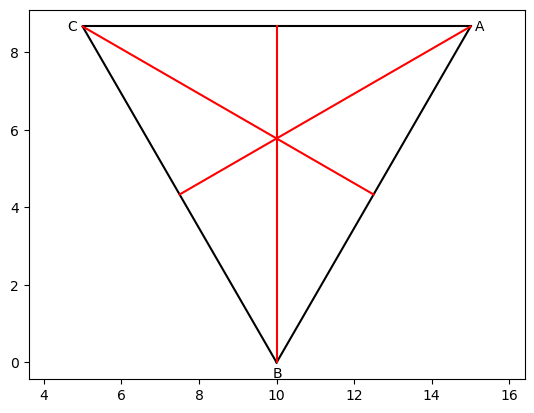

In [2]:
# length of triangle sides
l_side = 10.0

# origin of triangle
origin = np.array([10.0, 0.0])

# internal angle
angle = 60.0 * np.pi / 180.0

# right and left vertices of triangle
right_vertex = np.array([origin[0] + 
                         l_side*np.cos(angle), origin[1]+l_side*np.sin(angle)])
left_vertex = np.array([origin[0] - 
                        l_side*np.cos(angle), origin[1]+l_side*np.sin(angle)])

# midpoints of triangle sides
midpoint_top = np.array([origin[0], origin[1] + l_side*np.sin(angle)])
midpoint_right = np.array([origin[0] + 
                           l_side*np.cos(angle)/2.0, origin[1]+l_side*np.sin(angle)/2.0])
midpoint_left = np.array([origin[0] - 
                          l_side*np.cos(angle)/2.0, origin[1]+l_side*np.sin(angle)/2.0])

# collect the points
# B is the origin of the triangle
# A is the right vertex
# C is the left vertex
# rows 1 and 2 are line A B
# rows 3 and 4 are line A C
# rows 5 and 6 are line B C
# rows 7 and 8 are perpendicular bisector of line A B
# rows 9 and 10 are perpendicular bisector of line A C
# rows 11 and 12 are perpendicular bisector of line B C
points = np.array([right_vertex, origin, right_vertex, left_vertex, 
                   origin, left_vertex, midpoint_right, left_vertex,
                   midpoint_top, origin, midpoint_left, right_vertex])

# plot the triangle and label the vertices
# plot the sides of the triangle in black
# and the perpendicular bisectors in red
fig, ax = plt.subplots()
for i in range(0, 6, 2):
    ax.plot(points[i:i+2, 0], points[i:i+2, 1], "k-")
for i in range(6, 12, 2):
    ax.plot(points[i:i+2, 0], points[i:i+2, 1], "r-")
ax.text(right_vertex[0]+0.1, right_vertex[1]-0.1, "A")
ax.text(origin[0]-0.1, origin[1]-0.4, "B")
ax.text(left_vertex[0]-0.4, left_vertex[1]-0.1, "C")

ax.axis("equal")

plt.show()

Then, let's deform the triangle with an angular shear $\psi=40$° (we choose not to display the displacement paths):

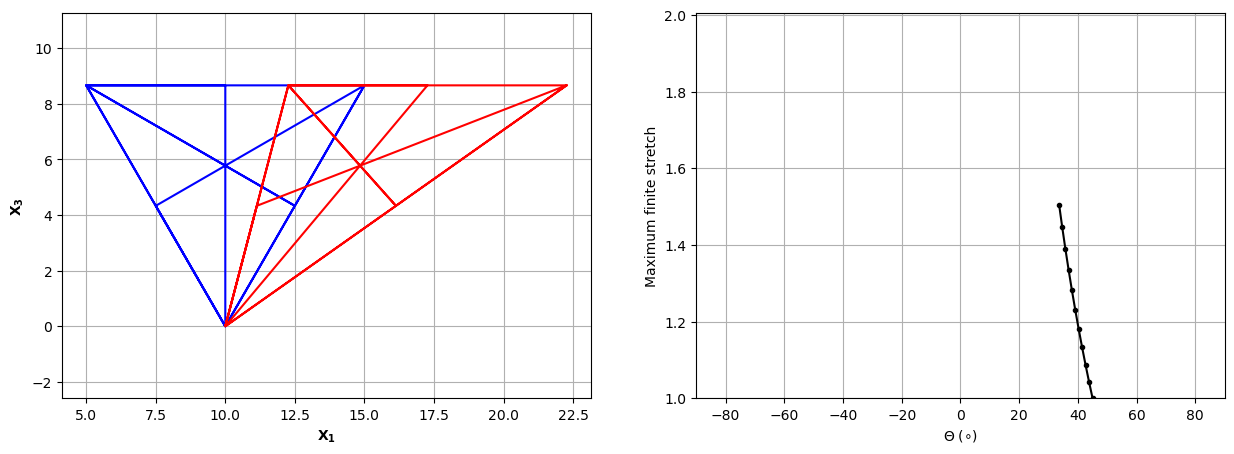

In [3]:
# shear strain
gamma = np.tan(40.0*np.pi/180.0)

# number of increments
ninc = 10

# deform and plot
fig,ax = plt.subplots(1,2,figsize=(15,5)) 
paths,psf = simple_shear(points,gamma,ninc,ax,d_p=False) 

plt.show()

The blue triangle is the undeformed geometry, and the red triangle is the deformed geometry. We are now in the position to plot the Mohr Circle for this deformation. We will use the sides of the triangle to do that. Notice that for angular shear $\psi$ and shear strain $\gamma$, if the perpendicular to the line rotated clockwise these values are negative, and viceversa. Therefore, we should expect the $\gamma$ of line AB to be positive, that of line AC to be negative and equal to the $\gamma$ applied to the box ($\tan(40)$°), and that of line BC to be positive:

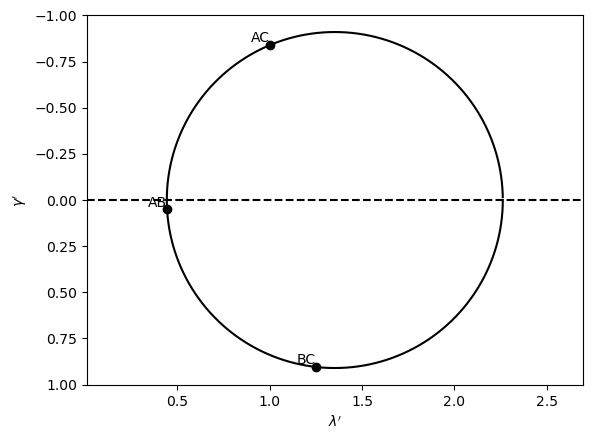

In [4]:
# original sides
o_ab = paths[0,0:2,:]
o_ac = paths[0,2:4,:]
o_bc = paths[0,4:6,:]
# final sides
f_ab = paths[-1,0:2,:]
f_ac = paths[-1,2:4,:]
f_bc = paths[-1,4:6,:]
# final bisectors
f_m_ab = paths[-1,6:8,:]
f_m_ac = paths[-1,8:10,:]
f_m_bc = paths[-1,10:12,:]

# calculate lambda and lambda prime for each side
_, _, lam_ab, lam_p_ab = length_strain_from_line(o_ab,f_ab)
_, _, lam_ac, lam_p_ac = length_strain_from_line(o_ac,f_ac)
_, _, lam_bc, lam_p_bc = length_strain_from_line(o_bc,f_bc)

# calculate shear strain (gamma) for each side
gam_ab = shear_strain_from_lines(f_ab,f_m_ab)
gam_ac = shear_strain_from_lines(f_ac,f_m_ac)
gam_bc = shear_strain_from_lines(f_bc,f_m_bc)

# calculate gamma prime for each side
gam_p_ab = gam_ab / lam_ab
gam_p_ac = gam_ac / lam_ac
gam_p_bc = gam_bc / lam_bc

# now plot these three points and the circle that passes through them
circle = Circle([0,0],1.0) # unit circle centered at the origin
points = np.array([[lam_p_ab,gam_p_ab],[lam_p_ac,gam_p_ac],[lam_p_bc,gam_p_bc]])
circle.fit_three_points(points)
x,y = circle.coordinates()

# figure
fig,ax = plt.subplots()
# plot the circle
ax.plot(x,y,"k-")
# plot the three points
labels = ["AB","AC","BC"]
for i in range(3):
    ax.plot(points[i,0],points[i,1],"ko")
    ax.text(points[i,0],points[i,1],labels[i], 
            horizontalalignment="right", verticalalignment="bottom")
ax.axhline(0,color="k",linestyle="--")
ax.set_xlabel(r"$\lambda^{\prime}$")
ax.set_ylabel(r"$\gamma^{\prime}$")
# gamma prime increases downwards
ax.invert_yaxis()
ax.axis("equal")

plt.show()

This is the Mohr Circle that defines the triangle's deformation. Of course, we can do much more with it. Le't s compute the maximum and minimum stretches:

In [5]:
# lambda prime 1 and 3
lam_p_1 = circle.center[0] - circle.radius
lam_p_3 = circle.center[0] + circle.radius
# compute S1 and S3
S1 = np.sqrt(1/lam_p_1)
S3 = np.sqrt(1/lam_p_3)
# output the principal stretches
print(f"S1 = {S1:.4f}")
print(f"S3 = {S3:.4f}")

S1 = 1.5040
S3 = 0.6649


The Mohr Circle has a very interesting point which is called the pole, or origin of lines (Ragan, 2009). We can determine the pole by tracing lines from points AB, AC and BC, with the same orientation that these lines have in the deformed triangle. These lines will intersect the other side of the circumference at the pole:

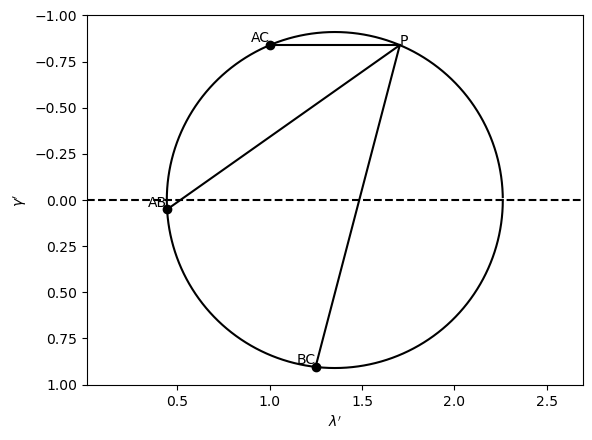

In [6]:
# angles of the sides
theta_ba = np.arctan((f_ab[0,1] - f_ab[1,1]) / 
                     (f_ab[0,0] - f_ab[1,0])) * 180/np.pi
theta_ac = np.arctan((f_ac[1,1] - f_ac[0,1]) / 
                     (f_ac[1,0] - f_ac[0,0])) * 180/np.pi
theta_bc = np.arctan((f_bc[1,1] - f_bc[0,1]) / 
                     (f_bc[1,0] - f_bc[0,0])) * 180/np.pi

# chords in the circle
# need to take complement of the angles
# because gamma prime increases downwards
pole = circle.chord_endpoint(points[0,:], 180.0-theta_ba)
chord_ab = np.array([points[0,:], pole])
pole = circle.chord_endpoint(points[1,:], 180.0-theta_ac)
chord_ac = np.array([points[1,:], pole])
pole = circle.chord_endpoint(points[2,:], 180.0-theta_bc)
chord_bc = np.array([points[2,:], pole])

# figure
fig,ax = plt.subplots()
# plot the circle
ax.plot(x,y,"k-")
# plot the three points
labels = ["AB","AC","BC"]
for i in range(3):
    ax.plot(points[i,0],points[i,1],"ko")
    ax.text(points[i,0],points[i,1],labels[i], 
            horizontalalignment="right", verticalalignment="bottom")
# plot the chords
ax.plot(chord_ab[:,0],chord_ab[:,1],"k-")
ax.plot(chord_ac[:,0],chord_ac[:,1],"k-")
ax.plot(chord_bc[:,0],chord_bc[:,1],"k-")
ax.text(pole[0],pole[1],"P")
# plot horizontal line at gamma prime = 0
ax.axhline(0,color="k",linestyle="--")
# axes
ax.set_xlabel(r"$\lambda^{\prime}$")
ax.set_ylabel(r"$\gamma^{\prime}$")
# gamma prime increases downwards
ax.invert_yaxis()
ax.axis("equal")

plt.show()

P is the pole or origin of lines. From this point, we can trace lines to define the orientations of the long and short axes of the ellipse (in red below), the lines of maximum shear strain $\gamma_{max}$ (in green below), and the lines of no finite elongation (in blue below):

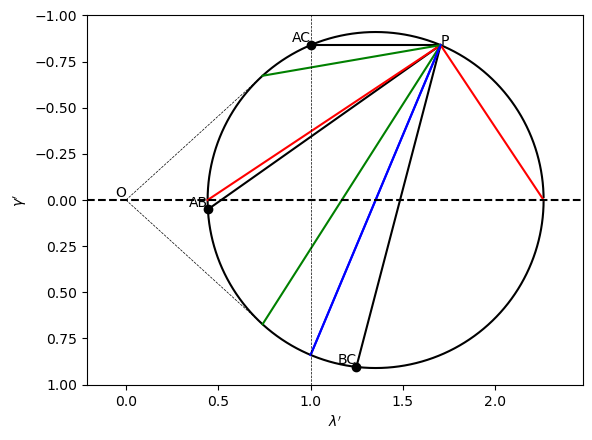

In [7]:
# S1 and S3 directions
pr_dir = np.array([pole, [lam_p_1, 0], pole, [lam_p_3, 0]])

# maximum shear strain directions, these are defined 
# by the tangents from the origin to the circle
_, x_tan, y_tan = circle.tangent_from_origin()
tangents = np.array([[0, 0], [x_tan, y_tan], [0,0], [x_tan, -y_tan]])
max_shear = np.array([pole, [x_tan, y_tan], pole, [x_tan, -y_tan]])

# directions of lines of no finite elongation
# along these lines lambda prime is 1.0
gam_p = circle.y_at_x(1.0)
lnfe = np.array([pole, [1.0, gam_p], pole, [1.0, gam_p]])

# figure
fig,ax = plt.subplots()
# plot the circle
ax.plot(x,y,"k-")
# plot the three points
labels = ["AB","AC","BC"]
for i in range(3):
    ax.plot(points[i,0],points[i,1],"ko")
    ax.text(points[i,0],points[i,1],labels[i], 
            horizontalalignment="right", verticalalignment="bottom")
# plot the chords
ax.plot(chord_ab[:,0],chord_ab[:,1],"k-")
ax.plot(chord_ac[:,0],chord_ac[:,1],"k-")
ax.plot(chord_bc[:,0],chord_bc[:,1],"k-")
ax.text(pole[0],pole[1],"P")
# plot the S1 and S3, gamma_max and lnfe directions
for i in range(0, 4, 2):
    ax.plot(pr_dir[i:i+2,0],pr_dir[i:i+2,1],"r-")
    ax.plot(tangents[i:i+2,0],tangents[i:i+2,1],"k--",linewidth=0.5)
    ax.plot(max_shear[i:i+2,0],max_shear[i:i+2,1],"g-")
    ax.plot(lnfe[i:i+2,0],lnfe[i:i+2,1],"b-")
# plot horizontal line at gamma prime = 0
ax.axhline(0,color="k",linestyle="--")
# plot vertical line at lambda prime = 1
ax.axvline(1.0,color="k",linestyle="--",linewidth=0.5)
# mark the origin
ax.text(0,0,"O",horizontalalignment="right", verticalalignment="bottom")
# axes
ax.set_xlabel(r"$\lambda^{\prime}$")
ax.set_ylabel(r"$\gamma^{\prime}$")
# gamma prime increases downwards
ax.invert_yaxis()
ax.axis("equal")

plt.show()

Note that line AC is one of the lines of no finite elongation (LNFE). This makes sense, since AC is parallel to the cards: The cards don't get shortened or extended, but just slip past each other.

Translate this rosette of lines to the deformed triangle so that the AB, AC, and BC directions align with the sides of the triangle. You will then be able to draw the S1, S3, $\gamma_{max}$, and LNFE directions in the triangle. 

Further practice: 

1. For the same experiment, draw a Mohr Circle for a smaller angular shear $\psi=20$°. Then, draw a Mohr Circle for a larger angular shear $\psi=60$°

2. Use the perpendicular bisectors instead of the triangle sides to construct the Mohr Circle. You should get the same Mohr Circle, pole, and orientations than when using the triangle sides.